In [2]:
#23/8/24 Analyses Chemopy Results

import pandas as pd
import numpy as np

In [3]:
#Read NN results
#this is in a text file as the model creator cannot keep variables to maintain memory limits

with open('/Users/james/Documents/Honours/Results/Figure_Development/Chemopy/resultsdata/ChemopyNN_out.txt', 'r') as file:
    text = file.read()
    
import re

pattern = re.compile(r'\bmcc = .+$', re.MULTILINE)
lines = pattern.findall(text)

# Print or process the matching lines
results = []
for line in lines:
    results.append(float(line[6:]))

In [4]:
results

[0.3530829547225743,
 0.0,
 0.45723402834709337,
 0.0,
 0.41065324603889813,
 0.48970461459793163,
 0.5395818099391085,
 0.44964026275209085,
 0.5705763292358926,
 0.2508986187070821,
 0.3016933268392621,
 0.423273435266739,
 0.44529050658343367,
 0.5834518571189314,
 0.6451404641413351,
 0.40957102903597453,
 0.47104793887064794,
 0.0,
 0.5033281126575019,
 0.3311296376339095,
 0.6178421847192422,
 0.5471792375496609]

In [5]:
import os
datasets = []
index = []
directory = '/Users/james/Documents/Honours/Results/Figure_Development/Chemopy/resultsdata/'
namelist = []
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if 'csv' in filename:
        pathname = directory + file
        df = pd.read_csv(pathname)
        datasets.append(df)
        namelist.append(filename)

In [6]:
namelist

['chemopy_svm.csv', 'chemopy_rf.csv', 'chemopy_knn.csv']

In [7]:
index = ['SVM', 'RF', 'KNN', 'NN']

In [38]:
rf = 0
svm = 0
knn = 0
nn = 0
for item in mcclist[0]:
    svm = svm + item
for item in mcclist[1]:
    rf = rf + item
for item in mcclist[2]:
    knn = knn + item
for item in mcclist[3]:
    nn = nn + item

print(svm, rf, knn, nn)

6.241174292169159 10.150063472304682 8.307493310314088 8.80031959475731


In [8]:
mcclist = []
for data in datasets:
    mcclist.append(data['MCC'].values.tolist())
mcclist.append(results)

In [9]:
datalist = datasets[0]['Dataset'].values
temp = []
for item in datalist:
    temp.append(item[:-4])
datalist = temp

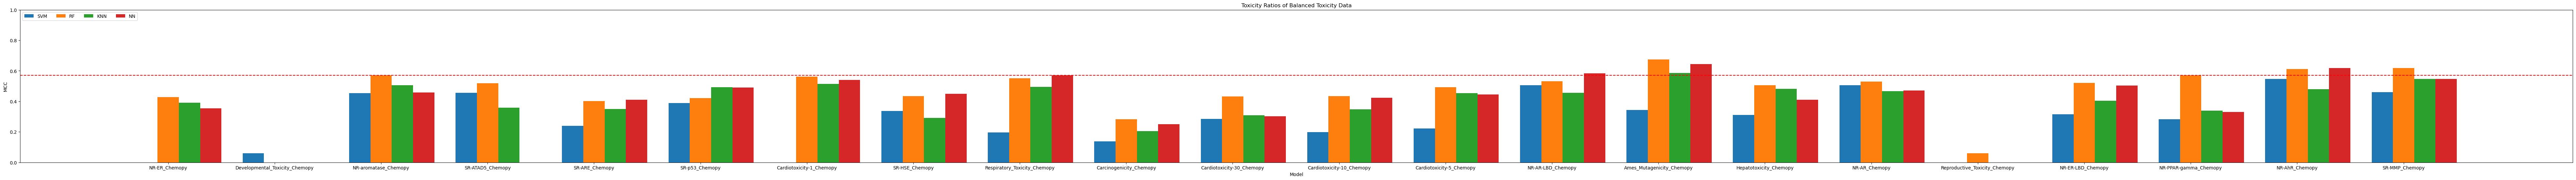

In [10]:
import matplotlib.pyplot as plt
data = mcclist

models = ('Sample Count', 'Positive Samples', 'Negative Samples')
x = np.arange(len(datalist))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0


fig, ax = plt.subplots(figsize=(100, 6))
for measurement in data:
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=index[multiplier])
    multiplier += 1

ax.set_ylabel('MCC')
ax.set_xlabel('Model')
ax.set_title('Toxicity Ratios of Balanced Toxicity Data')
ax.set_xticks(x + width, datalist)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 1)
plt.axhline(y=0.57, color='r', linestyle='--', label='Quality Threshold (0.57)')

plt.show()

In [11]:
import statistics
meanvals = []
loops = 0
for val in mcclist[0]:
    currdata = []
    for item in mcclist:
        currdata.append(item[loops])
    
    mean = statistics.mean(currdata)
    meanvals.append(mean)
    loops +=1

In [12]:
loops = 0
for val in meanvals:
    print(datalist[loops], ':', val)
    
    loops += 1

NR-ER_Chemopy : 0.2931239397995312
Developmental_Toxicity_Chemopy : -0.026935275391946928
NR-aromatase_Chemopy : 0.49661035509679347
SR-ATAD5_Chemopy : 0.3337229076616818
SR-ARE_Chemopy : 0.3500205439747175
SR-p53_Chemopy : 0.447916625990617
Cardiotoxicity-1_Chemopy : 0.40439103412125266
SR-HSE_Chemopy : 0.37820951998998176
Respiratory_Toxicity_Chemopy : 0.4530110206768031
Carcinogenicity_Chemopy : 0.21941439229130807
Cardiotoxicity-30_Chemopy : 0.33173239556822653
Cardiotoxicity-10_Chemopy : 0.3503650892980398
Cardiotoxicity-5_Chemopy : 0.40291608951605395
NR-AR-LBD_Chemopy : 0.5189587704418968
Ames_Mutagenicity_Chemopy : 0.5618732509668121
Hepatotoxicity_Chemopy : 0.4269489117993397
NR-AR_Chemopy : 0.4934489123692104
Reproductive_Toxicity_Chemopy : 0.0149403576166799
NR-ER-LBD_Chemopy : 0.43563482951150934
NR-PPAR-gamma_Chemopy : 0.38085866578231065
NR-AhR_Chemopy : 0.5643251975998923
SR-MMP_Chemopy : 0.5432751327055987


In [14]:
loops = 0

srindex = []
nrindex = []
devrepindex = []
cardioindex = []
otherindex = []

for item in datalist:
    if 'SR-' in item:
        srindex.append(loops)
    if 'NR-' in item:
        nrindex.append(loops)
    if 'Cardio' in item:
        cardioindex.append(loops)
    if 'Develop' in item or 'Repro' in item:
        devrepindex.append(loops)
    if 'Mutag' in item or 'Carc' in item or 'Resp' in item or 'Hepa' in item:
        otherindex.append(loops)
    loops += 1
    
superlist = [srindex, nrindex, devrepindex, cardioindex, otherindex]
graphorder = ['Endocrine SR', 'Endocrine NR', 'Developmental & Reproductive', 'Cardiotoxicity', 'Remaining Datasets']

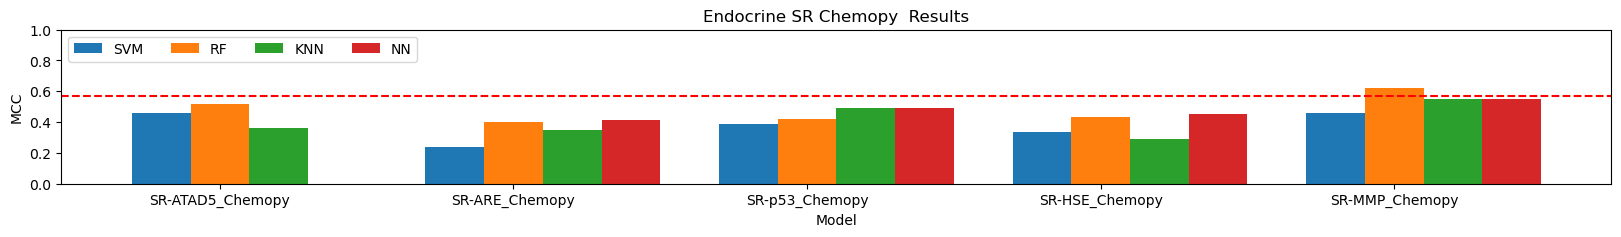

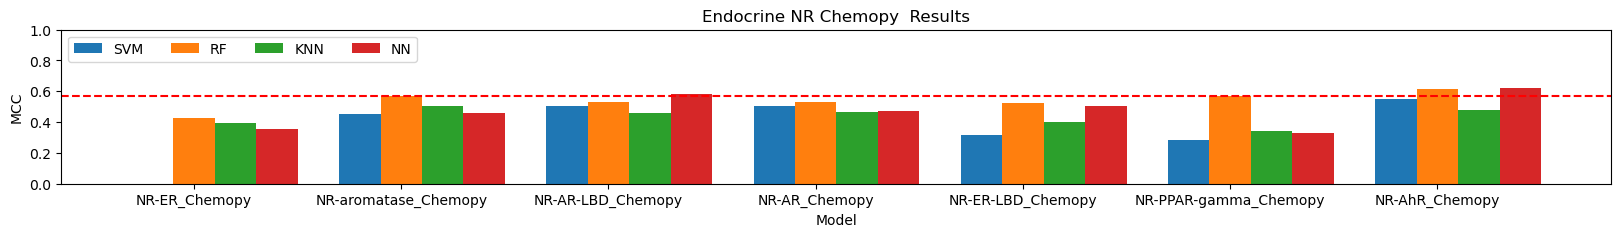

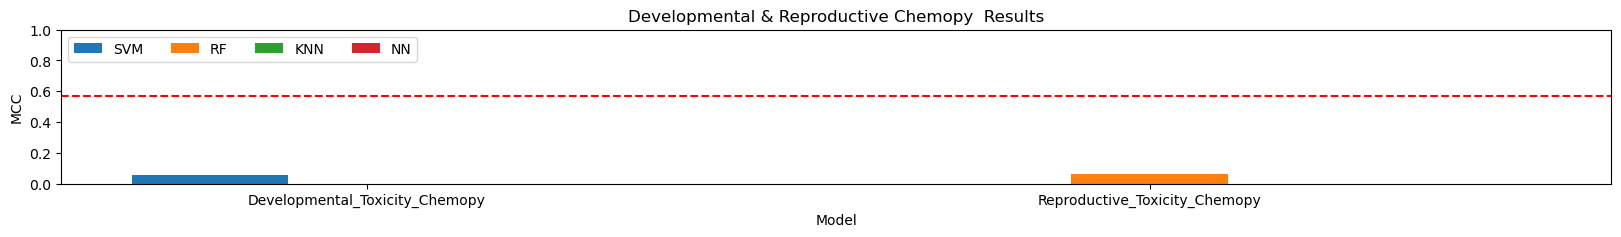

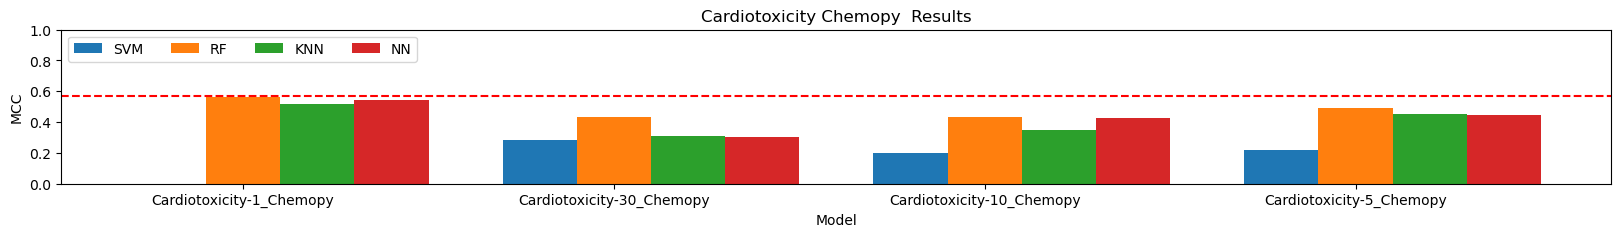

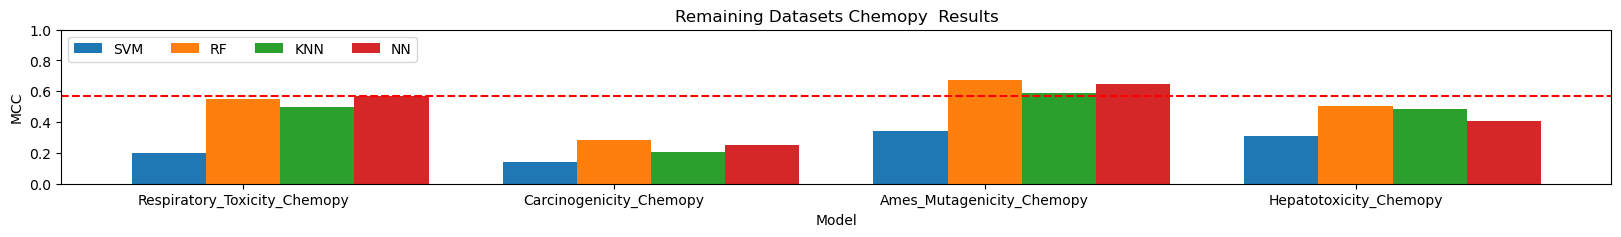

In [16]:
iterations = 0
for curr in superlist:
    endovals = [[], [], [], []]
    endonames = []
    for val in  curr:
        endovals[0].append(mcclist[0][val])
        endovals[1].append(mcclist[1][val])
        endovals[2].append(mcclist[2][val])
        endovals[3].append(mcclist[3][val])
        endonames.append(datalist[val])

    import matplotlib.pyplot as plt
    data = endovals

    x = np.arange(len(curr))  # the label locations
    width = 0.2  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(figsize=(20, 2))
    for measurement in data:
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=index[multiplier])
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('MCC')
    ax.set_xlabel('Model')
    graphname = graphorder[iterations] + ' Chemopy  Results'
    ax.set_title(graphname)
    ax.set_xticks(x + width, endonames)
    ax.legend(loc='upper left', ncols=4)
    ax.set_ylim(0, 1)
    plt.axhline(y=0.57, color='r', linestyle='--', label='Quality Cutoff (0.57)')

    plt.show()
    iterations +=1

In [29]:
endoindex = [0, 2, 3, 4, 5, 7, 13, 16, 18, 19, 20, 21]
cardioindex = [6, 12, 11, 10]
devrepindex = [1, 17]
mutacarcheparespindex = [14, 9, 15, 8]

In [30]:
endovals = [[], [], [], []]
endonames = []
for val in endoindex:
    endovals[0].append(mcclist[0][val])
    endovals[1].append(mcclist[1][val])
    endovals[2].append(mcclist[2][val])
    endovals[3].append(mcclist[3][val])
    endonames.append(datalist[val])

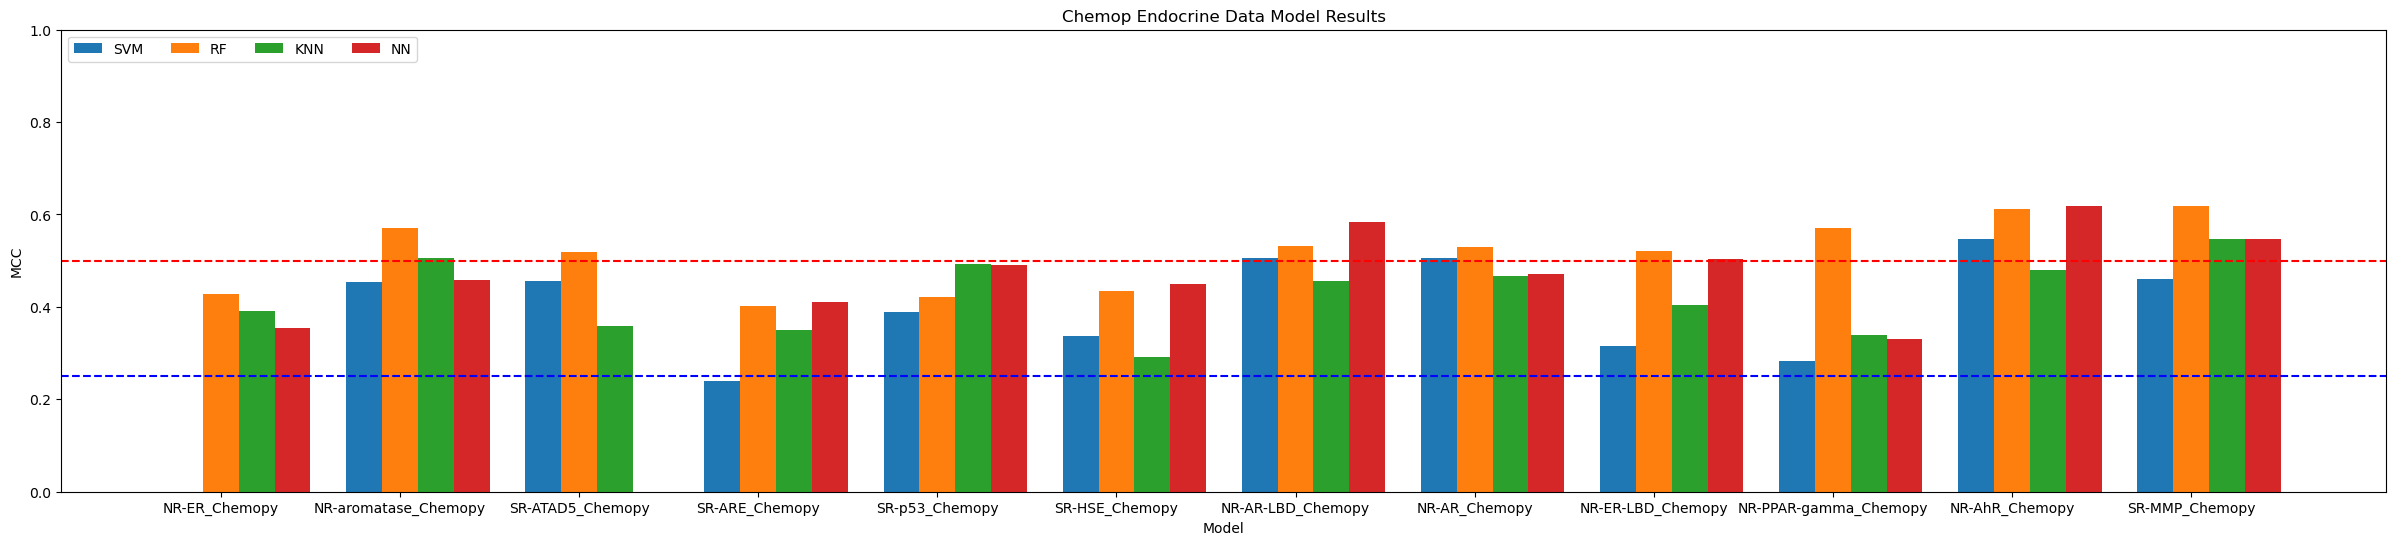

In [22]:
import matplotlib.pyplot as plt
data = endovals

x = np.arange(len(endoindex))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(30, 6))
for measurement in data:
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=index[multiplier])
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MCC')
ax.set_xlabel('Model')
ax.set_title('Chemop Endocrine Data Model Results')
ax.set_xticks(x + width, endonames)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 1)
plt.axhline(y=0.5, color='r', linestyle='--', label='y=0.5')
plt.axhline(y=0.25, color='b', linestyle='--', label='y=0.25')

plt.show()

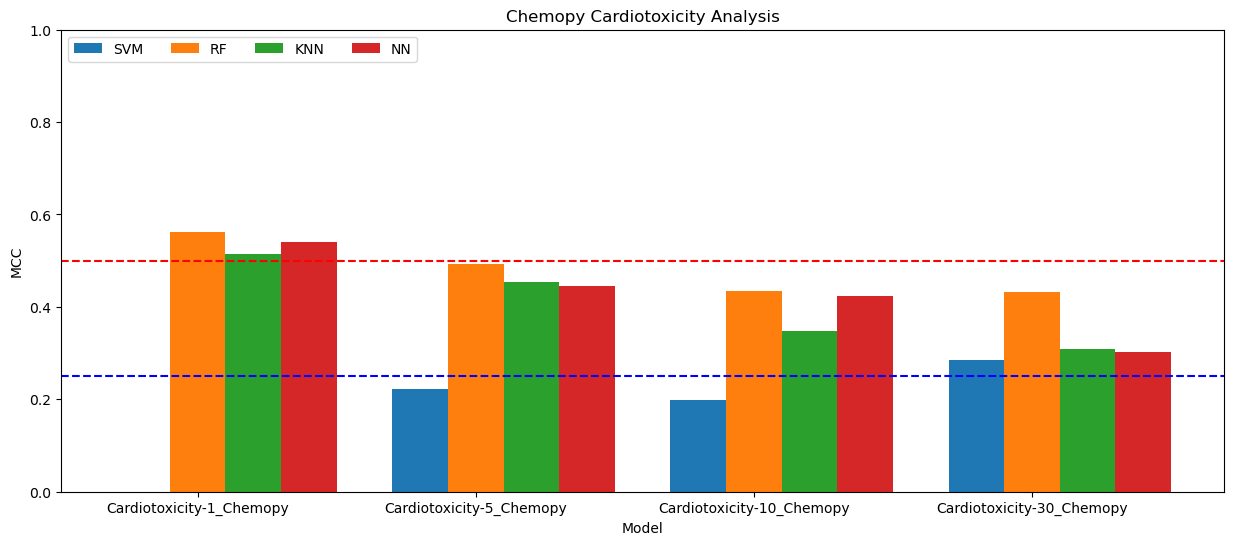

In [116]:
cardiovals = [[], [], [], []]
cardionames = []
for val in cardioindex:
    cardiovals[0].append(mcclist[0][val])
    cardiovals[1].append(mcclist[1][val])
    cardiovals[2].append(mcclist[2][val])
    cardiovals[3].append(mcclist[3][val])
    cardionames.append(datalist[val])
    
import matplotlib.pyplot as plt
data = cardiovals

x = np.arange(len(cardioindex))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(15, 6))
for measurement in data:
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=index[multiplier])
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MCC')
ax.set_xlabel('Model')
ax.set_title('Chemopy Cardiotoxicity Analysis')
ax.set_xticks(x + width, cardionames)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 1)
plt.axhline(y=0.5, color='r', linestyle='--', label='y=0.5')
plt.axhline(y=0.25, color='b', linestyle='--', label='y=0.25')

plt.show()

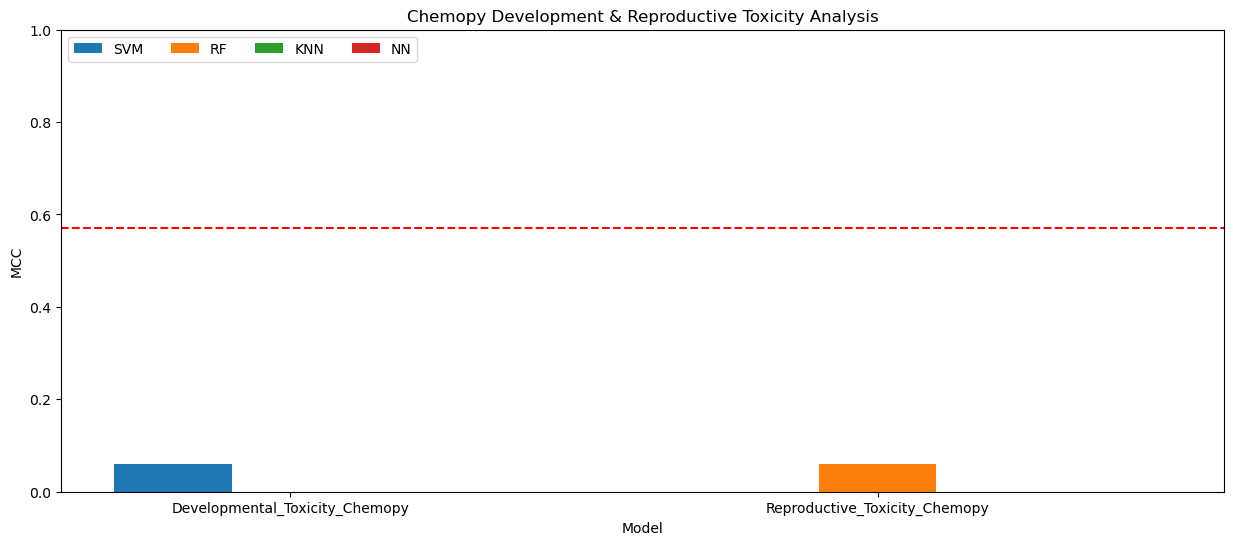

In [31]:
devrepvals = [[], [], [], []]
devrepnames = []
for val in devrepindex:
    devrepvals[0].append(mcclist[0][val])
    devrepvals[1].append(mcclist[1][val])
    devrepvals[2].append(mcclist[2][val])
    devrepvals[3].append(mcclist[3][val])
    devrepnames.append(datalist[val])
    
import matplotlib.pyplot as plt
data = devrepvals

x = np.arange(len(devrepindex))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(15, 6))
for measurement in data:
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=index[multiplier])
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MCC')
ax.set_xlabel('Model')
ax.set_title('Chemopy Development & Reproductive Toxicity Analysis')
ax.set_xticks(x + width, devrepnames)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 1)
plt.axhline(y=0.57, color='r', linestyle='--', label='Quality Threshold')


plt.show()

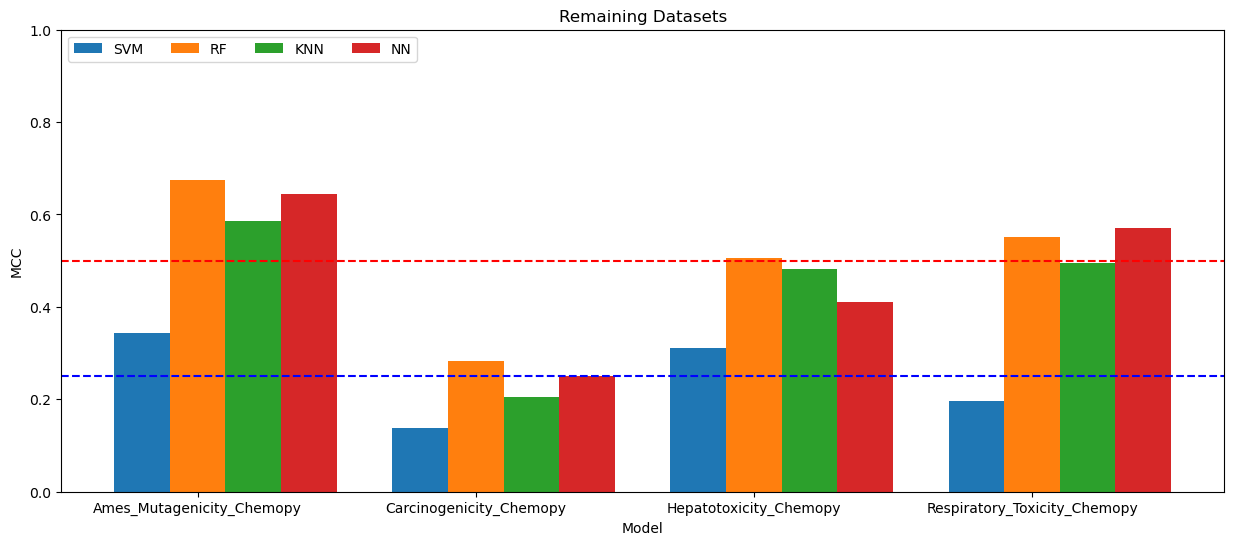

In [118]:
mutacarcheparespvals = [[], [], [], []]
mutacarcheparespnames = []
for val in mutacarcheparespindex:
    mutacarcheparespvals[0].append(mcclist[0][val])
    mutacarcheparespvals[1].append(mcclist[1][val])
    mutacarcheparespvals[2].append(mcclist[2][val])
    mutacarcheparespvals[3].append(mcclist[3][val])
    mutacarcheparespnames.append(datalist[val])
    
import matplotlib.pyplot as plt
data = mutacarcheparespvals

x = np.arange(len(mutacarcheparespindex))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(15, 6))
for measurement in data:
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=index[multiplier])
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MCC')
ax.set_xlabel('Model')
ax.set_title('Remaining Datasets')
ax.set_xticks(x + width, mutacarcheparespnames)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 1)
plt.axhline(y=0.5, color='r', linestyle='--', label='y=0.5')
plt.axhline(y=0.25, color='b', linestyle='--', label='y=0.25')

plt.show()

In [23]:
import sys
sys.path.insert(1, '/Users/james/Documents/Honours/Python') 
from Function_Repo import setbalance
import math


seed = 81
#Data import
rawdata = []
directory = '/Users/james/Documents/Honours/Data/ProcessedRaws/'
names = []
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if 'csv' in filename:
        pathname = directory + file
        df = pd.read_csv(pathname)
        df = setbalance(df)
        rawdata.append(df)
        names.append(filename[:-4])

In [24]:
samplecount = []
for item in rawdata:
    samplecount.append(len(item['Toxicity_Value'].values))

In [25]:
loops = 0
for item in names:
    print(item, ':', samplecount[loops])
    loops += 1

Cardiotoxicity-30 : 688
NR-AR-LBD : 480
Hepatotoxicity : 2889
SR-ARE : 2119
Respiratory_Toxicity : 1348
NR-AhR : 1674
SR-p53 : 847
Reproductive_Toxicity : 41
NR-ER : 1836
SR-HSE : 760
SR-MMP : 2106
SR-ATAD5 : 516
NR-PPAR-gamma : 365
Carcinogenicity : 1021
NR-ER-LBD : 726
Cardiotoxicity-10 : 1547
Cardiotoxicity-5 : 1547
NR-aromatase : 604
Developmental_Toxicity : 69
Ames_Mutagenicity : 7485
NR-AR : 625
Cardiotoxicity-1 : 1547


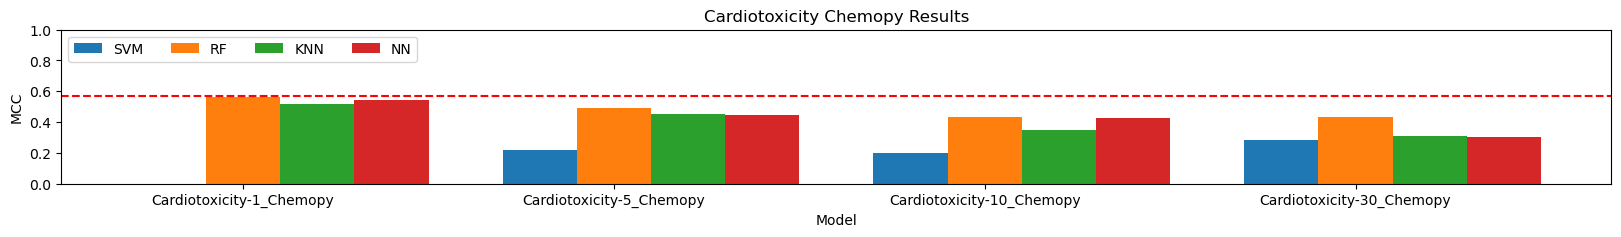

In [28]:
curr = cardioindex
curr = [6,12,11,10]
endovals = [[], [], [], []]
endonames = []
for val in  curr:
    endovals[0].append(mcclist[0][val])
    endovals[1].append(mcclist[1][val])
    endovals[2].append(mcclist[2][val])
    endovals[3].append(mcclist[3][val])
    endonames.append(datalist[val])
data = endovals

x = np.arange(len(curr))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(20, 2))
for measurement in data:
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=index[multiplier])
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MCC')
ax.set_xlabel('Model')
graphname = graphorder[3] + ' Chemopy Results'
ax.set_title(graphname)
ax.set_xticks(x + width, endonames)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 1)
plt.axhline(y=0.57, color='r', linestyle='--', label='Quality Cutoff (0.57)')

plt.show()
iterations +=1

In [21]:
cardioindex

[6, 10, 11, 12]

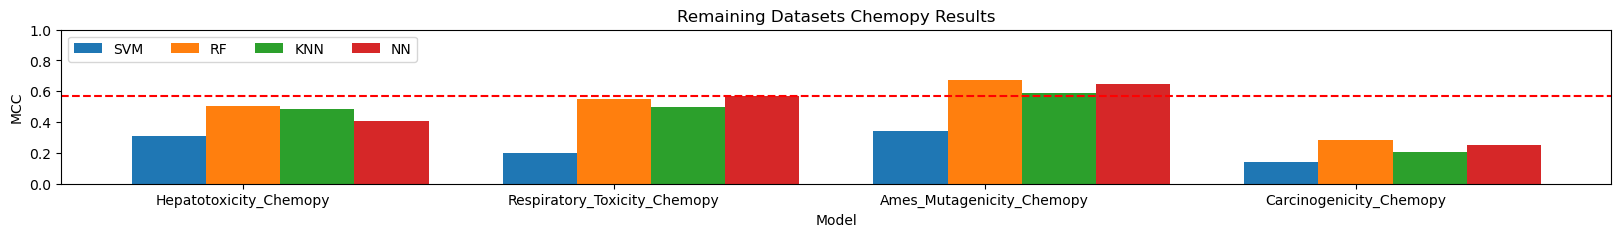

In [37]:
curr = otherindex
curr = [15,8,14,9]
endovals = [[], [], [], []]
endonames = []
for val in  curr:
    endovals[0].append(mcclist[0][val])
    endovals[1].append(mcclist[1][val])
    endovals[2].append(mcclist[2][val])
    endovals[3].append(mcclist[3][val])
    endonames.append(datalist[val])
data = endovals

x = np.arange(len(curr))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(20, 2))
for measurement in data:
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=index[multiplier])
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MCC')
ax.set_xlabel('Model')
graphname = graphorder[4] + ' Chemopy Results'
ax.set_title(graphname)
ax.set_xticks(x + width, endonames)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 1)
plt.axhline(y=0.57, color='r', linestyle='--', label='Quality Cutoff (0.57)')

plt.show()
iterations +=1

In [40]:
total = 0
for item in mcclist:
    for thing in item:
        total = thing + total
bing = total / 88
print(bing)

0.3806710303357414
